In [107]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [108]:
IMAGE_SIZE = [224, 224]

In [109]:
train_directory="C:\\Users\\narra\\Downloads\\archive\\train"
test_directory="C:\\Users\\narra\\Downloads\\archive\\test"
val_directory="C:\\Users\\narra\\Downloads\\archive\\valid"

In [110]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [111]:
  # useful for getting number of classes
folders = glob("C:\\Users\\narra\\Downloads\\archive\\train\\*")
len(folders)

525

In [112]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [113]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         


                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       295168    
                                                                 
 block3_conv2 (Conv2D)       (None, 56, 56, 256)       590080    
                                                                 
 block3_conv3 (Conv2D)       (None, 56, 56, 256)       590080    
                                                                 
 block3_pool (MaxPooling2D)  (None, 28, 28, 256)       0         
                                                                 
 block4_co

In [114]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [115]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_directory,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 84635 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.


In [116]:
print(len(training_set))
print(len(test_set))

2645
83


In [118]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


C:\Users\narra\AppData\Local\Temp\ipykernel_12660\483701032.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
   1/2645 [..............................] - ETA: 3:06:35 - loss: 2.1584 - accuracy: 0.6250

KeyboardInterrupt: 

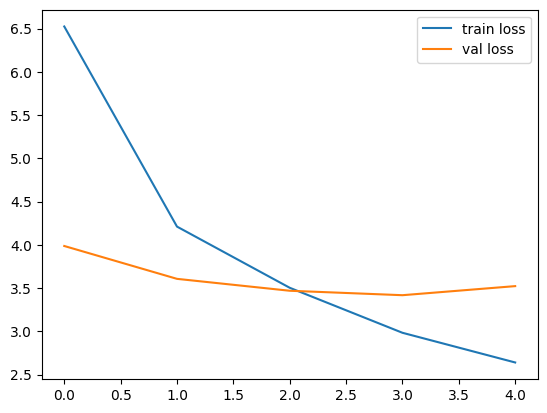

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

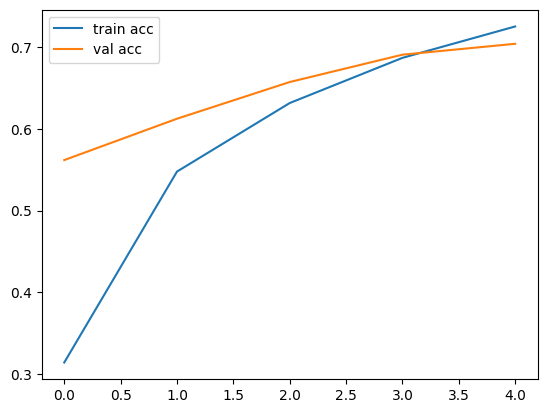

In [ ]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
model.save('BCC.h5')

In [ ]:
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array

model1 = load_model('./BCC.h5',compile=False)  

In [123]:
lab = training_set.class_indices
lab={k:v for v,k in lab.items()}
print(len(lab))

525


In [132]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model1.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    # print(y)
    res = lab[y]
    # print(lab[y])
    return res

1/1 [==============================] - 0s 192ms/step


'BARN OWL'

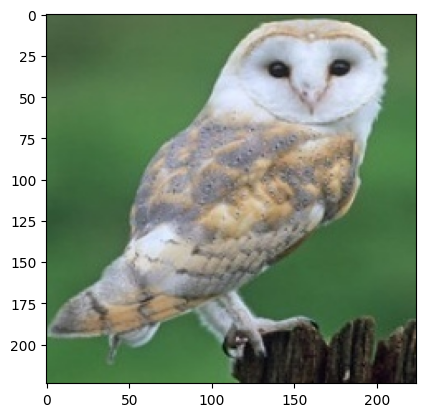

In [133]:
img='C:\\Users\\narra\\Downloads\\archive\\valid\\BARN OWL\\1.jpg'
pic=load_img('C:\\Users\\narra\\Downloads\\archive\\valid\\BARN OWL\\1.jpg',target_size=(224,224,3))
plt.imshow(pic)
output(img)

In [120]:
import tensorflow as tf
import keras as k
print(tf.__version__)
print(k.__version__)

2.15.0
2.15.0
